# Building a K-Nearest Neighbors classifier

A K-Nearest Neighbors classifier is a classification model that uses the nearest neighbors algorithm to classify a given data point. The algorithm finds the K closest data points in the training dataset to identify the category of the input data point. It will then assign a class to this data point based on a majority vote. From the list of those K data points, we look at the corresponding classes and pick the one with the highest number of votes. Let's see how to build a classifier using this model. The value of K depends on the problem at hand.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
from sklearn import neighbors, datasets 

Load input data 

In [2]:
input_file = 'data.txt' 
data = np.loadtxt(input_file, delimiter=',') 
X, y = data[:, :-1], data[:, -1].astype(np.int) 

Visualize the input data using four different marker shapes. We need to map the labels to corresponding markers, which is where the mapper variable comes into the picture:

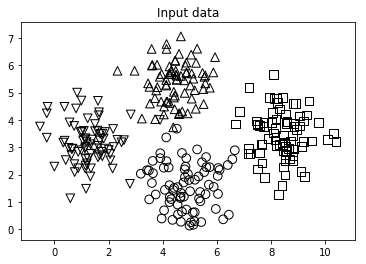

In [5]:
# Plot input data 
plt.figure() 
plt.title('Input data') 
marker_shapes = 'v^os' 
mapper = [marker_shapes[i] for i in y] 
for i in range(X.shape[0]): 
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],  
            s=75, edgecolors='black', facecolors='none') 

Define the number of nearest neighbors we want to use:

In [6]:
# Number of nearest neighbors  
num_neighbors = 12 

Define the step size of the grid that will be used to visualize the boundaries of the classifier model:

In [7]:
# Step size of the visualization grid 
step_size = 0.01   

Create the K Nearest Neighbors classifier model:

In [8]:
# Create a K Nearest Neighbors classifier model  
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance') 

Train the model using training data:

In [9]:
# Train the K Nearest Neighbours model 
classifier.fit(X, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='distance')

Create the mesh grid of values that will be used to visualize the grid:

In [10]:
# Create the mesh to plot the boundaries 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),  
        np.arange(y_min, y_max, step_size)) 

Evaluate the classifier on all the points on the grid to create a visualization of the boundaries:

In [11]:
# Evaluate the classifier on all the points on the grid  
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()]) 

Create a color mesh to visualize the output:

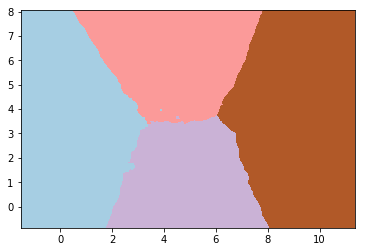

In [12]:
# Visualize the predicted output  
output = output.reshape(x_values.shape) 
plt.figure() 
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired) 
